In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')

# 데이터 전처리

In [ ]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [ ]:
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [ ]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [ ]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [ ]:
# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

In [ ]:
# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# 모델 생성 및 예측(과제부분)

In [ ]:
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

In [ ]:
model=RandomForestRegressor(n_estimators=500, criterion="squared_error", warm_start=True, max_features=None)
model.fit(train_x,train_y)

RandomForestRegressor(max_features=None, n_estimators=500, warm_start=True)

In [ ]:
pred = model.predict(test)

# 제출

In [ ]:
submission = pd.read_csv('submission.csv')
submission

,title,box_off_num
0,용서는 없다,596877
1,아빠가 여자를 좋아해,586991
2,하모니,625422
3,의형제,623200
4,평행 이론,611739
...,...,...
238,해에게서 소년에게,510786
239,울보 권투부,515009
240,어떤살인,574661
241,말하지 못한 비밀,534330


In [ ]:
submission['box_off_num'] = pred

In [ ]:
submission

,title,box_off_num
0,용서는 없다,2649394.178
1,아빠가 여자를 좋아해,1668318.272
2,하모니,1563762.876
3,의형제,1799017.220
4,평행 이론,1052299.492
...,...,...
238,해에게서 소년에게,177209.560
239,울보 권투부,4135.178
240,어떤살인,258360.692
241,말하지 못한 비밀,9450.150


In [ ]:
submission.to_csv('베이스라인.csv',index = False)

# 제출 점수(과제부분)

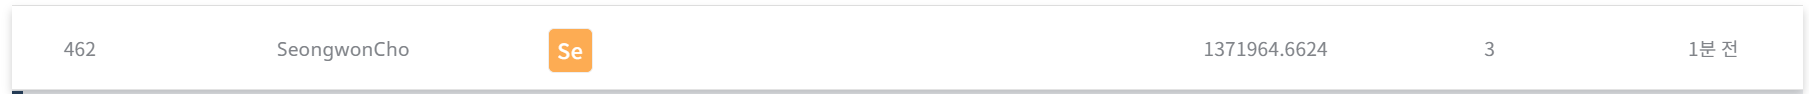